In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict


In [2]:
class batsman_score(TypedDict):
    runs:int
    balls:int
    boundery:int
    six:int 

    sr:float
    bnp:float
    bounder_percent:float
    summary:str 

In [8]:
def srr (state:batsman_score):
    sr= (state['runs']/state['balls'])*100
    state['sr']=sr 
    return state['sr']


In [9]:
def bnpp(state:batsman_score):
    bnp=((state['balls'])/(state['boundery']+ state['six']))*100
    state['bnp']=bnp

    return state['bnp']

In [10]:
def boundery_per(state:batsman_score):
    percent= ((((state['boundery']*4))+(state['six']*6))/ state['balls'])*100

    state['bounder_percent']=percent
    return state['bounder_percent']

In [11]:
def summ(state:batsman_score):
    sr= state['sr']
    bnp=state['bnp']
    boundery_per=state['bounder_percent']

    summary=f"""
        The strike rate is {sr},
        The boundary per ball is {bnp},
        The boudery percentage is {boundery_per}.
        """
    state['summary']=summary

    return state['summary']

In [13]:
# Create graph
graph= StateGraph(batsman_score)

# Create Node
graph.add_node('srr',srr)
graph.add_node('bnpp',bnpp)
graph.add_node('boundery_per',boundery_per)
graph.add_node('summ',summ)

# Add edge

graph.add_edge(START,"srr")
graph.add_edge(START,"bnpp")
graph.add_edge(START,"boundery_per")
graph.add_edge('srr','summ')
graph.add_edge('bnpp','summ')
graph.add_edge('boundery_per','summ')
graph.add_edge('summ',END)


work= graph.compile()

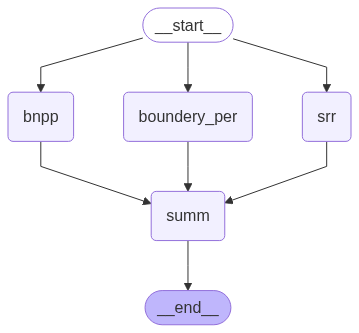

In [14]:
work

In [ ]:
intial_state = {
    'runs': 100,
    'balls': 50,
    'fours': 6,
    'sixes': 4
}

work.invoke(intial_state)